In [27]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [28]:
# Load CSVs
df_day_minus1 = pd.read_csv("prices_round_2_day_-1.csv", delimiter=";")
df_day_0 = pd.read_csv("prices_round_2_day_0.csv", delimiter=";")
df_day_1 = pd.read_csv("prices_round_2_day_1.csv", delimiter=";")

# Helper function to process a day’s DataFrame
def make_day_df(df):
    # Filter to only needed products
    products = ["CROISSANTS", "JAMS", "DJEMBES", "PICNIC_BASKET1", "PICNIC_BASKET2"]
    df_filtered = df[df["product"].isin(products)][["timestamp", "product", "mid_price"]]
    
    # Pivot to wide format
    df_pivot = df_filtered.pivot(index="timestamp", columns="product", values="mid_price").reset_index()
    
    # Compute synthetic baskets
    df_pivot["SYNTHETIC_PICNIC_BASKET1"] = (
        6 * df_pivot["CROISSANTS"] + 3 * df_pivot["JAMS"] + 1 * df_pivot["DJEMBES"]
    )
    df_pivot["SYNTHETIC_PICNIC_BASKET2"] = (
        4 * df_pivot["CROISSANTS"] + 2 * df_pivot["JAMS"]
    )
    
    return df_pivot

# Process each day
df_day_minus1 = make_day_df(df_day_minus1)
df_day_0 = make_day_df(df_day_0)
df_day_1 = make_day_df(df_day_1)


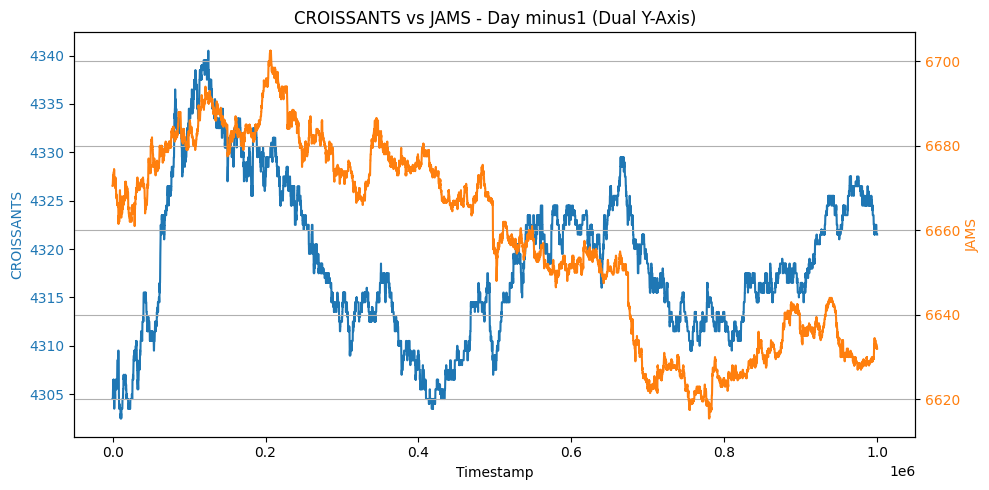

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CROISSANTS on the left y-axis
ax1.plot(df_day_minus1["timestamp"], df_day_minus1["CROISSANTS"], color="tab:blue", label="CROISSANTS")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("CROISSANTS", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for JAMS
ax2 = ax1.twinx()
ax2.plot(df_day_minus1["timestamp"], df_day_minus1["JAMS"], color="tab:orange", label="JAMS")
ax2.set_ylabel("JAMS", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("CROISSANTS vs JAMS - Day minus1 (Dual Y-Axis)")
plt.grid(True)
plt.tight_layout()
plt.show()

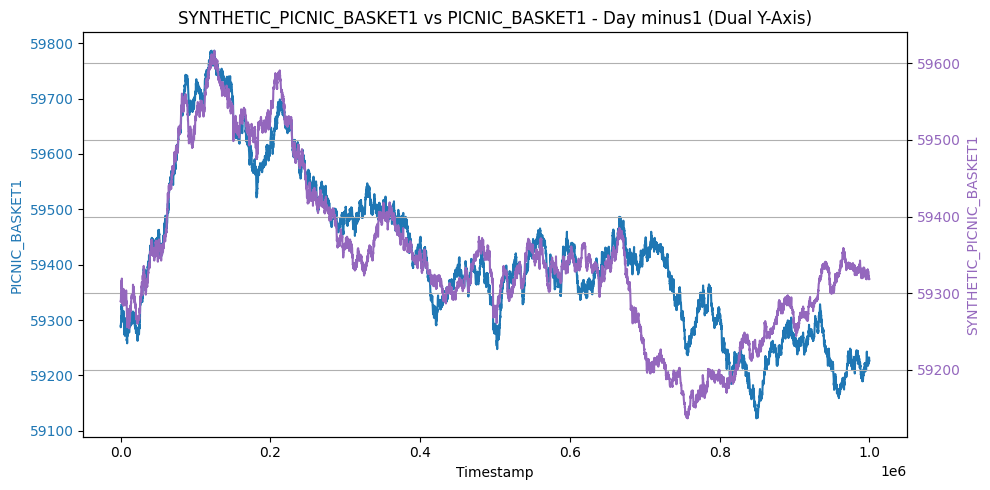

In [30]:
##########################
## PLOT actual vs. synth -1 ##
##########################

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CROISSANTS on the left y-axis
ax1.plot(df_day_minus1["timestamp"], df_day_minus1["PICNIC_BASKET1"], color="tab:blue", label="PICNIC_BASKET1")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("PICNIC_BASKET1", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for JAMS
ax2 = ax1.twinx()
ax2.plot(df_day_minus1["timestamp"], df_day_minus1["SYNTHETIC_PICNIC_BASKET1"], color="tab:purple", label="SYNTHETIC_PICNIC_BASKET1")
ax2.set_ylabel("SYNTHETIC_PICNIC_BASKET1", color="tab:purple")
ax2.tick_params(axis="y", labelcolor="tab:purple")

plt.title("SYNTHETIC_PICNIC_BASKET1 vs PICNIC_BASKET1 - Day minus1 (Dual Y-Axis)")
plt.grid(True)
plt.tight_layout()
plt.show()

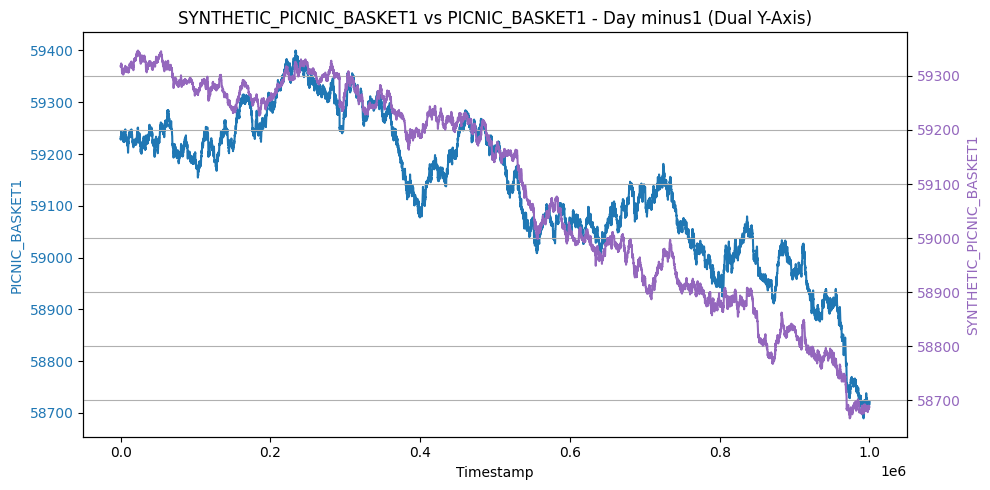

In [31]:
##########################
## PLOT actual vs. synth -1 ##
##########################

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CROISSANTS on the left y-axis
ax1.plot(df_day_0["timestamp"], df_day_0["PICNIC_BASKET1"], color="tab:blue", label="PICNIC_BASKET1")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("PICNIC_BASKET1", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for JAMS
ax2 = ax1.twinx()
ax2.plot(df_day_0["timestamp"], df_day_0["SYNTHETIC_PICNIC_BASKET1"], color="tab:purple", label="SYNTHETIC_PICNIC_BASKET1")
ax2.set_ylabel("SYNTHETIC_PICNIC_BASKET1", color="tab:purple")
ax2.tick_params(axis="y", labelcolor="tab:purple")

plt.title("SYNTHETIC_PICNIC_BASKET1 vs PICNIC_BASKET1 - Day minus1 (Dual Y-Axis)")
plt.grid(True)
plt.tight_layout()
plt.show()

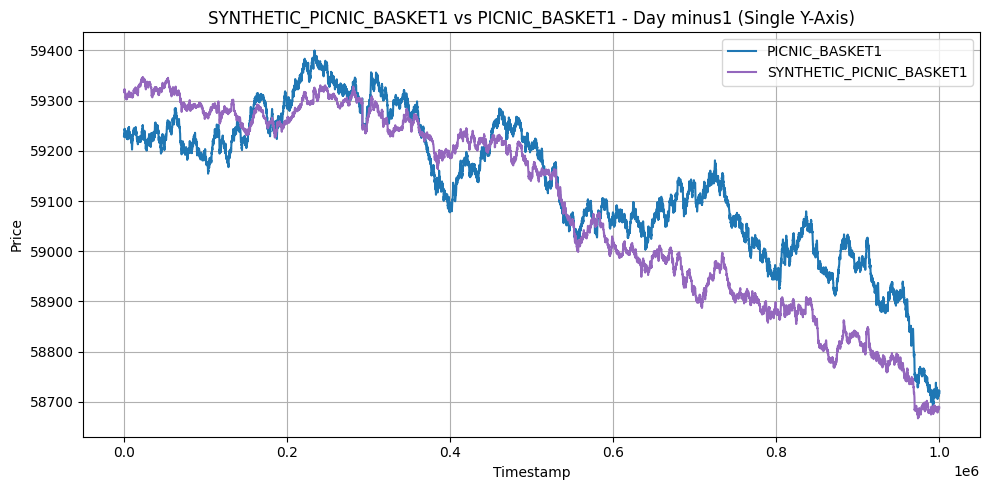

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot both on the same y-axis
ax1.plot(df_day_0["timestamp"], df_day_0["PICNIC_BASKET1"], color="tab:blue", label="PICNIC_BASKET1")
ax1.plot(df_day_0["timestamp"], df_day_0["SYNTHETIC_PICNIC_BASKET1"], color="tab:purple", label="SYNTHETIC_PICNIC_BASKET1")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Price")
ax1.set_title("SYNTHETIC_PICNIC_BASKET1 vs PICNIC_BASKET1 - Day minus1 (Single Y-Axis)")
ax1.grid(True)
ax1.legend()
plt.tight_layout()
plt.show()

In [33]:
# Get lengths of each dataframe
len_minus1 = len(df_day_minus1)
len_0 = len(df_day_0)
len_1 = len(df_day_1)

# Reassign new timestamp indices
df_day_minus1 = df_day_minus1.copy()
df_day_minus1["timestamp"] = range(0, len_minus1)

df_day_0 = df_day_0.copy()
df_day_0["timestamp"] = range(len_minus1, len_minus1 + len_0)

df_day_1 = df_day_1.copy()
df_day_1["timestamp"] = range(len_minus1 + len_0, len_minus1 + len_0 + len_1)

# Concatenate them together
df_all_days = pd.concat([df_day_minus1, df_day_0, df_day_1], axis=0).reset_index(drop=True)


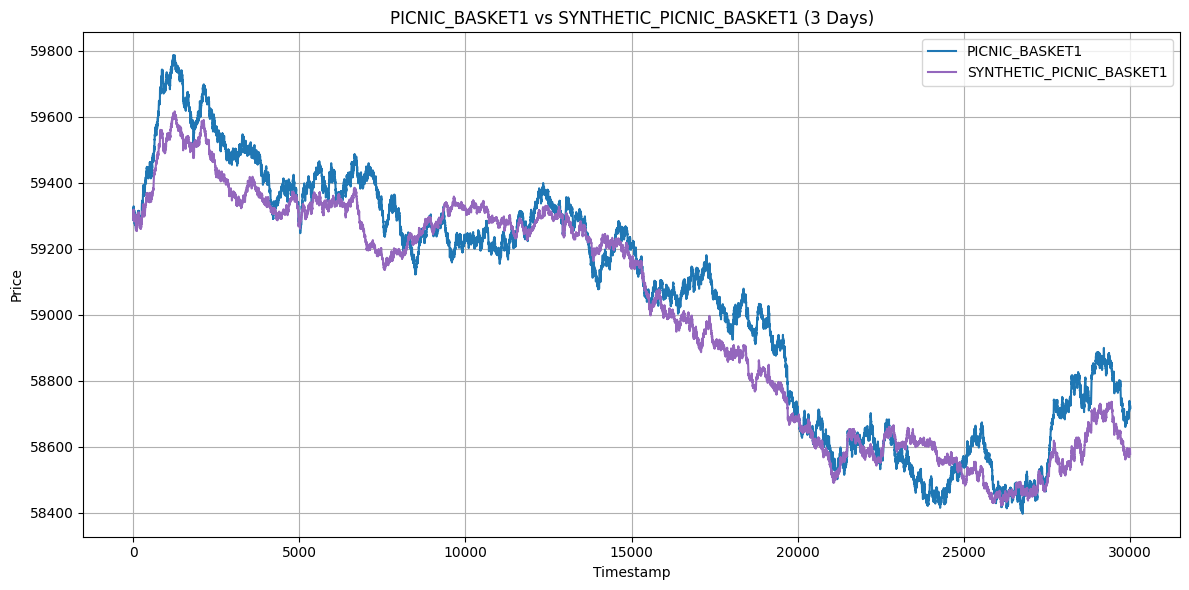

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_all_days["timestamp"], df_all_days["PICNIC_BASKET1"], label="PICNIC_BASKET1", color="tab:blue")
ax.plot(df_all_days["timestamp"], df_all_days["SYNTHETIC_PICNIC_BASKET1"], label="SYNTHETIC_PICNIC_BASKET1", color="tab:purple")

ax.set_xlabel("Timestamp")
ax.set_ylabel("Price")
ax.set_title("PICNIC_BASKET1 vs SYNTHETIC_PICNIC_BASKET1 (3 Days)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

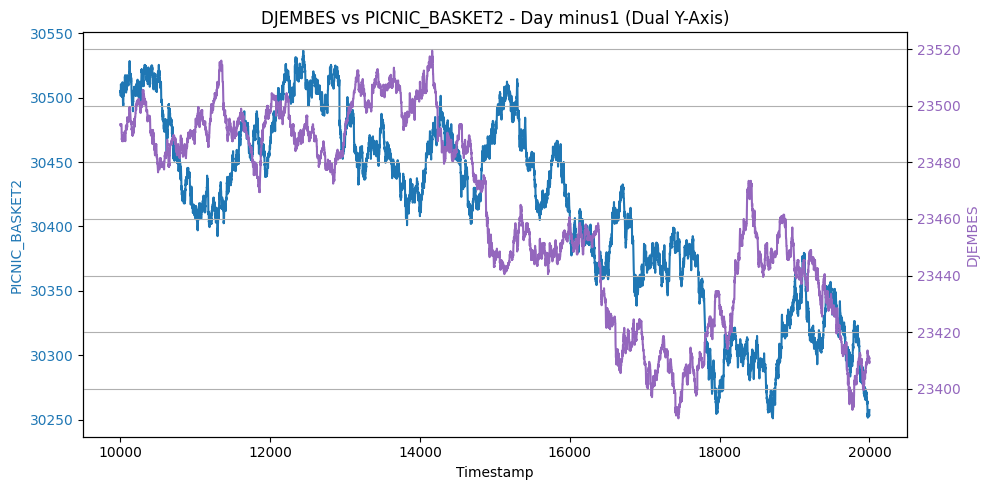

In [36]:
##########################
## PLOT actual vs. synth -1 ##
##########################

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CROISSANTS on the left y-axis
ax1.plot(df_day_0["timestamp"], df_day_0["PICNIC_BASKET2"], color="tab:blue", label="PICNIC_BASKET2")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("PICNIC_BASKET2", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for JAMS
ax2 = ax1.twinx()
ax2.plot(df_day_0["timestamp"], df_day_0["DJEMBES"] + 10000, color="tab:purple", label="DJEMBES")
ax2.set_ylabel("DJEMBES", color="tab:purple")
ax2.tick_params(axis="y", labelcolor="tab:purple")

plt.title("DJEMBES vs PICNIC_BASKET2 - Day minus1 (Dual Y-Axis)")
plt.grid(True)
plt.tight_layout()
plt.show()